In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
pd.set_option('display.max_rows', 50)

import os
# Use this to see how much memory the dataframes use
from sys import getsizeof

import yaml

import pseudopeople as pp
from pseudopeople.utilities import get_configuration
from vivarium.framework.randomness import RandomnessStream

from vivarium_research_prl.utils import sizemb, MappingViaAttributes
from vivarium_research_prl import datatypes
from vivarium_research_prl.noise import corruption, fake_names, noisify
from vivarium_research_prl.find_kids import datasets, noisify_data

!date
!whoami
!uname -a
!pwd

Fri 31 Mar 2023 07:51:13 PM PDT
ndbs
Linux gen-slurm-sarchive-p0135 5.4.0-135-generic #152-Ubuntu SMP Wed Nov 23 20:19:22 UTC 2022 x86_64 x86_64 x86_64 GNU/Linux
/mnt/share/code/ndbs/vivarium_research_prl/pseudopeople_testing


In [2]:
%load_ext autoreload
%autoreload 2

# Find data

```
/mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/full_scale_334mil/united_states_of_america/2023_03_30_10_23_13/final_results/2023_03_30_16_02_39
```

In [3]:
project_output_dir = \
    '/mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop'
output_subdir = (
    'results/full_scale_334mil'
    '/united_states_of_america/2023_03_30_10_23_13'
    '/final_results/2023_03_30_16_02_39'
)
output_dir = f'{project_output_dir}/{output_subdir}'

!ls -halt $output_dir

total 404K
drwxrwsr-x  3 sbachmei IHME-Simulationscience 1.5K Mar 30 17:15 ..
drwxrwsr-x  2 sbachmei IHME-Simulationscience 167K Mar 30 16:52 tax_dependents_observer
drwxrwsr-x  2 sbachmei IHME-Simulationscience 167K Mar 30 16:44 tax_1040_observer
drwxrwsr-x  2 sbachmei IHME-Simulationscience 339K Mar 30 16:42 logs
drwxrwsr-x  2 sbachmei IHME-Simulationscience 167K Mar 30 16:31 tax_w2_observer
drwxrwsr-x  2 sbachmei IHME-Simulationscience 167K Mar 30 16:28 social_security_observer
drwxrwsr-x  2 sbachmei IHME-Simulationscience 167K Mar 30 16:28 wic_observer
drwxrwsr-x  2 sbachmei IHME-Simulationscience 167K Mar 30 16:28 household_survey_observer_cps
drwxrwsr-x  2 sbachmei IHME-Simulationscience 167K Mar 30 16:28 household_survey_observer_acs
drwxrwsr-x  2 sbachmei IHME-Simulationscience 167K Mar 30 16:26 decennial_census_observer
drwxrwsr-x 11 sbachmei IHME-Simulationscience 4.5K Mar 30 16:21 .


In [4]:
!ls -halt $output_dir/tax_w2_observer

total 199G
-rw-r--r--  1 sbachmei IHME-Simulationscience 614M Mar 30 17:07 tax_w2_observer_3568.csv.bz2
-rw-r--r--  1 sbachmei IHME-Simulationscience 603M Mar 30 17:04 tax_w2_observer_7551.csv.bz2
-rw-r--r--  1 sbachmei IHME-Simulationscience 613M Mar 30 17:04 tax_w2_observer_7086.csv.bz2
-rw-r--r--  1 sbachmei IHME-Simulationscience 613M Mar 30 17:00 tax_w2_observer_5440.csv.bz2
-rw-r--r--  1 sbachmei IHME-Simulationscience 598M Mar 30 16:58 tax_w2_observer_9292.csv.bz2
-rw-r--r--  1 sbachmei IHME-Simulationscience 606M Mar 30 16:42 tax_w2_observer_1282.csv.bz2
-rw-r--r--  1 sbachmei IHME-Simulationscience 611M Mar 30 16:39 tax_w2_observer_1007.csv.bz2
-rw-r--r--  1 sbachmei IHME-Simulationscience 610M Mar 30 16:34 tax_w2_observer_2277.csv.bz2
-rw-r--r--  1 sbachmei IHME-Simulationscience 606M Mar 30 16:34 tax_w2_observer_1483.csv.bz2
-rw-r--r--  1 sbachmei IHME-Simulationscience 597M Mar 30 16:33 tax_w2_observer_1482.csv.bz2
-rw-r--r--  1 sbachmei IHME-Simulationscience 606M Mar 30 1

In [5]:
!ls -halt $output_dir/decennial_census_observer

total 16G
-rw-r--r--  1 sbachmei IHME-Simulationscience  46M Mar 30 16:58 decennial_census_observer_3568.csv.bz2
-rw-r--r--  1 sbachmei IHME-Simulationscience  49M Mar 30 16:56 decennial_census_observer_7551.csv.bz2
-rw-r--r--  1 sbachmei IHME-Simulationscience  48M Mar 30 16:56 decennial_census_observer_7086.csv.bz2
-rw-r--r--  1 sbachmei IHME-Simulationscience  48M Mar 30 16:54 decennial_census_observer_5440.csv.bz2
-rw-r--r--  1 sbachmei IHME-Simulationscience  48M Mar 30 16:53 decennial_census_observer_9292.csv.bz2
-rw-r--r--  1 sbachmei IHME-Simulationscience  49M Mar 30 16:28 decennial_census_observer_1282.csv.bz2
drwxrwsr-x  2 sbachmei IHME-Simulationscience 167K Mar 30 16:26 .
-rw-r--r--  1 sbachmei IHME-Simulationscience  48M Mar 30 16:26 decennial_census_observer_1007.csv.bz2
-rw-r--r--  1 sbachmei IHME-Simulationscience  48M Mar 30 16:25 decennial_census_observer_1483.csv.bz2
-rw-r--r--  1 sbachmei IHME-Simulationscience  49M Mar 30 16:25 decennial_census_observer_1482.csv.b

# Choose a random seed and define filepaths

In [9]:
seed = 3568
w2_dir = f'{output_dir}/tax_w2_observer'
census_dir = f'{output_dir}/decennial_census_observer'

w2_path = f'{w2_dir}/tax_w2_observer_{seed}.csv.bz2'
census_path = f'{census_dir}/decennial_census_observer_{seed}.csv.bz2'

In [8]:
w2_path

'/mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/full_scale_334mil/united_states_of_america/2023_03_30_10_23_13/final_results/2023_03_30_16_02_39/tax_w2_observer/tax_w2_observer_3568.csv.bz2'

In [20]:
census_path

'/mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/full_scale_334mil/united_states_of_america/2023_03_30_10_23_13/final_results/2023_03_30_16_02_39/decennial_census_observer/decennial_census_observer_3568.csv.bz2'

# Generate noisy W2/1099 data

In [7]:
%%time
df_w2_noisy = pp.generate_w2(w2_path)
df_w2_noisy

CPU times: user 2min 44s, sys: 15 s, total: 2min 59s
Wall time: 2min 59s


,tax_form,mailing_address_street_name,mailing_address_city,mailing_address_po_box,tax_year,employer_street_name,age,mailing_address_state,employer_state,date_of_birth,...,employer_zipcode,mailing_address_street_number,simulant_id,employer_city,employer_id,first_name,income,employer_street_number,last_name,mailing_address_zipcode
0,W2,se gillette ave,durham,0,2020,edgecliff ct,59,NC,VA,1961-10-19,...,22911,1091,3568_1,virginia beach,1090943,Coleen,55705.868111669326,,Corbin,
1,W2,tumwater ln,s diego,0,2020,n 52nd st,87,CA,MO,1933-07-08,...,65721,140,3568_3,raytown,460472,Carol,62177.50549857618,309,Nelson,95602
2,W2,tumwater ln,s diego,0,2020,skyview ter,51,CA,GA,1969-01-19,...,31707,140,3568_4,augusta,96598,Cindy,4010.4817413939854,1960,Nelson,95602
3,W2,abbott ct,sherman oaks,0,2020,ince dr,30,CA,FL,1990-06-24,...,32825,2410,3568_5,fort myers,494164,Brandi,26190.25795812783,e,Marquez,94521
4,W2,abbott ct,sherman oaks,0,2020,stoney crk cir,31,,ID,1989-01-09,...,83805,2410,3568_6,bayview,1499355,Chad,15138.669537931186,,Marquez,94521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9763200,W2,13th ave e,s diego,0,2029,gladys ave,23,CA,MA,2006-01-26,...,01536,8401,3568_1172730,boston,725417,Richard,351.32664813149916,6902,Matayoshi,92122
9763201,1099,choctaw ln,tempe,0,2029,hightower court nthwst,60,AZ,GA,1969-09-27,...,30058,19808,3568_1172735,roswell,1299275,Kerry,12665.206674001909,4522,Mauvais,85205
9763202,W2,n park ave,brandon,0,2029,clay hise ln,59,MS,IA,1970-12-27,...,52248,7217,3568_1172737,des moines,399446,Roy,8574.277826757512,828,Peoples,39481
9763203,W2,geranium crecent,henderson,0,2029,us 431 s hwy,30,NV,GA,1999-02-02,...,30228,8222,3568_1172738,atlanta,158167,Teresa,,607,Alvarez Caraballo,89081


In [14]:
%%time
print(sizemb(df_w2_noisy)) # 15.5 GB for one shard of noised W2 data

15533.590635
CPU times: user 15.8 s, sys: 820 ms, total: 16.6 s
Wall time: 16.6 s


# Load un-noised W2/1099 data for comparison

In [12]:
%%time
df_w2 = pd.read_csv(w2_path, dtype=str, keep_default_na=False)
df_w2

CPU times: user 1min 57s, sys: 4.83 s, total: 2min 2s
Wall time: 2min 2s


,tax_form,mailing_address_street_name,mailing_address_city,mailing_address_po_box,tax_year,employer_street_name,age,mailing_address_state,employer_state,date_of_birth,...,employer_zipcode,mailing_address_street_number,simulant_id,employer_city,employer_id,first_name,income,employer_street_number,last_name,mailing_address_zipcode
0,W2,se gillette ave,durham,0,2020,edgecliff ct,59,NC,VA,1961-10-19,...,22911,1091,3568_1,virginia beach,1090943,Coleen,55705.868111669326,,Corbin,28138
1,W2,tumwater ln,s diego,0,2020,n 52nd st,87,CA,MO,1933-07-08,...,65721,140,3568_3,raytown,460472,Carol,62177.50549857618,309,Nelson,95602
2,W2,tumwater ln,s diego,0,2020,skyview ter,51,CA,GA,1969-01-19,...,31707,140,3568_4,augusta,96598,Cindy,4010.4817413939854,1960,Nelson,95602
3,W2,abbott ct,sherman oaks,0,2020,ince dr,30,CA,FL,1990-06-24,...,32825,2410,3568_5,fort myers,494164,Brandi,26190.25795812783,e,Marquez,94521
4,W2,abbott ct,sherman oaks,0,2020,stoney crk cir,31,CA,ID,1989-01-09,...,83805,2410,3568_6,bayview,1499355,Chad,15138.669537931186,,Marquez,94521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9763200,W2,13th ave e,s diego,0,2029,gladys ave,23,CA,MA,2006-01-26,...,01536,8401,3568_1172730,boston,725417,Richard,351.32664813149916,6902,Matayoshi,92122
9763201,1099,choctaw ln,tempe,0,2029,hightower court nthwst,60,AZ,GA,1969-09-27,...,30058,19808,3568_1172735,roswell,1299275,Kerry,12665.206674001909,4522,Mauvais,85205
9763202,W2,n park ave,brandon,0,2029,clay hise ln,59,MS,IA,1970-12-27,...,52248,7217,3568_1172737,des moines,399446,Roy,8574.277826757512,828,Peoples,39481
9763203,W2,geranium crecent,henderson,0,2029,us 431 s hwy,30,NV,GA,1999-02-02,...,30228,8222,3568_1172738,atlanta,158167,Teresa,3281.288518380834,607,Alvarez Caraballo,89081


In [13]:
%%time
print(sizemb(df_w2)) # 15.5 GB for one shard of un-noised W2 data

15548.300661
CPU times: user 15.5 s, sys: 132 ms, total: 15.6 s
Wall time: 15.6 s


# Save the number of records in the file for convenience

n = 9,763,205

In [33]:
n = len(df_w2)
n

9763205

In [34]:
n == len(df_w2_noisy)

True

# Compare the two

In [32]:
%%time
df_w2.compare(df_w2_noisy)

CPU times: user 1min 5s, sys: 7.62 s, total: 1min 12s
Wall time: 1min 12s


tax_form       mailing_address_street_name       mailing_address_city  \
            self other                        self other                 self   
0            NaN   NaN                         NaN   NaN                  NaN   
4            NaN   NaN                         NaN   NaN                  NaN   
6            NaN   NaN                         NaN   NaN                  NaN   
8             W2                               NaN   NaN                  NaN   
11           NaN   NaN                         NaN   NaN                  NaN   
...          ...   ...                         ...   ...                  ...   
9763182      NaN   NaN                         NaN   NaN                  NaN   
9763189      NaN   NaN                         NaN   NaN                  NaN   
9763191      NaN   NaN                         NaN   NaN                  NaN   
9763197      NaN   NaN                         NaN   NaN                  NaN   
9763203      NaN   NaN                         NaN   NaN                  NaN   

              employer_street_name        age        ... first_name        \
        other                 self other self other  ...       self other   
0         NaN                  NaN   NaN  NaN   NaN  ...        NaN   NaN   
4         NaN                  NaN   NaN  NaN   NaN  ...        NaN   NaN   
6         NaN                  NaN   NaN  NaN   NaN  ...        NaN   NaN   
8         NaN                  NaN   NaN  NaN   NaN  ...        NaN   NaN   
11        NaN                  NaN   NaN  NaN   NaN  ...        NaN   NaN   
...       ...                  ...   ...  ...   ...  ...        ...   ...   
9763182   NaN                  NaN   NaN  NaN   NaN  ...        NaN   NaN   
9763189   NaN                  NaN   NaN  NaN   NaN  ...        NaN   NaN   
9763191   NaN                  NaN   NaN  NaN   NaN  ...        NaN   NaN   
9763197   NaN                  NaN   NaN  NaN   NaN  ...        NaN   NaN   
9763203   NaN                  NaN   NaN  NaN   NaN  ...        NaN   NaN   

                    income       employer_street_number       last_name        \
                      self other                   self other      self other   
0                      NaN   NaN                    NaN   NaN       NaN   NaN   
4                      NaN   NaN                    NaN   NaN       NaN   NaN   
6                      NaN   NaN                    NaN   NaN       NaN   NaN   
8                      NaN   NaN                    NaN   NaN       NaN   NaN   
11                     NaN   NaN                    NaN   NaN       NaN   NaN   
...                    ...   ...                    ...   ...       ...   ...   
9763182                NaN   NaN                    NaN   NaN       NaN   NaN   
9763189                NaN   NaN                    NaN   NaN       NaN   NaN   
9763191                NaN   NaN                   3599             NaN   NaN   
9763197                NaN   NaN                    NaN   NaN       NaN   NaN   
9763203  3281.288518380834                          NaN   NaN       NaN   NaN   

        mailing_address_zipcode        
                           self other  
0                         28138        
4                           NaN   NaN  
6                           NaN   NaN  
8                           NaN   NaN  
11                          NaN   NaN  
...                         ...   ...  
9763182                     NaN   NaN  
9763189                     NaN   NaN  
9763191                     NaN   NaN  
9763197                     NaN   NaN  
9763203                     NaN   NaN  

[1970912 rows x 44 columns]

# See what columns are in the data

In [16]:
df_w2.columns

Index(['tax_form', 'mailing_address_street_name', 'mailing_address_city',
       'mailing_address_po_box', 'tax_year', 'employer_street_name', 'age',
       'mailing_address_state', 'employer_state', 'date_of_birth',
       'employer_unit_number', 'mailing_address_unit_number', 'employer_name',
       'ssn', 'middle_initial', 'employer_zipcode',
       'mailing_address_street_number', 'simulant_id', 'employer_city',
       'employer_id', 'first_name', 'income', 'employer_street_number',
       'last_name', 'mailing_address_zipcode'],
      dtype='object')

# See which columns changed

All except `'simulant_id'`, `'tax_year'` (good, these two should not have noise), and `'mailing_address_po_box'` (but I would expect this column to have noise).

In [18]:
%%time
(df_w2 == df_w2_noisy).all()

CPU times: user 15.5 s, sys: 480 ms, total: 16 s
Wall time: 16 s


tax_form                         False
mailing_address_street_name      False
mailing_address_city             False
mailing_address_po_box            True
tax_year                          True
employer_street_name             False
age                              False
mailing_address_state            False
employer_state                   False
date_of_birth                    False
employer_unit_number             False
mailing_address_unit_number      False
employer_name                    False
ssn                              False
middle_initial                   False
employer_zipcode                 False
mailing_address_street_number    False
simulant_id                       True
employer_city                    False
employer_id                      False
first_name                       False
income                           False
employer_street_number           False
last_name                        False
mailing_address_zipcode          False
dtype: bool

# See which un-noised columns have missing values

```
mailing_address_street_name
employer_unit_number
mailing_address_unit_number
employer_name
mailing_address_street_number
employer_street_number
```

In [19]:
%%time
(df_w2 == '').any()

CPU times: user 10.7 s, sys: 51.9 ms, total: 10.8 s
Wall time: 10.8 s


tax_form                         False
mailing_address_street_name       True
mailing_address_city             False
mailing_address_po_box           False
tax_year                         False
employer_street_name             False
age                              False
mailing_address_state            False
employer_state                   False
date_of_birth                    False
employer_unit_number              True
mailing_address_unit_number       True
employer_name                     True
ssn                              False
middle_initial                   False
employer_zipcode                 False
mailing_address_street_number     True
simulant_id                      False
employer_city                    False
employer_id                      False
first_name                       False
income                           False
employer_street_number            True
last_name                        False
mailing_address_zipcode          False
dtype: bool

# See which _noised_ columns have missing data

All except `'tax_year'`, `'simulant_id'`, and `'mailing_address_po_box'`. These are the same three columns that didn't change after noising, which makes sense.

In [21]:
%%time
(df_w2_noisy == '').any()

CPU times: user 10.9 s, sys: 773 ms, total: 11.7 s
Wall time: 11.6 s


tax_form                          True
mailing_address_street_name       True
mailing_address_city              True
mailing_address_po_box           False
tax_year                         False
employer_street_name              True
age                               True
mailing_address_state             True
employer_state                    True
date_of_birth                     True
employer_unit_number              True
mailing_address_unit_number       True
employer_name                     True
ssn                               True
middle_initial                    True
employer_zipcode                  True
mailing_address_street_number     True
simulant_id                      False
employer_city                     True
employer_id                       True
first_name                        True
income                            True
employer_street_number            True
last_name                         True
mailing_address_zipcode           True
dtype: bool

# See if any missing values ended up non-missing

No. Good.

In [36]:
%%time
((df_w2 == '') & (df_w2_noisy != '')).any()

CPU times: user 20.1 s, sys: 644 ms, total: 20.7 s
Wall time: 20.7 s


tax_form                         False
mailing_address_street_name      False
mailing_address_city             False
mailing_address_po_box           False
tax_year                         False
employer_street_name             False
age                              False
mailing_address_state            False
employer_state                   False
date_of_birth                    False
employer_unit_number             False
mailing_address_unit_number      False
employer_name                    False
ssn                              False
middle_initial                   False
employer_zipcode                 False
mailing_address_street_number    False
simulant_id                      False
employer_city                    False
employer_id                      False
first_name                       False
income                           False
employer_street_number           False
last_name                        False
mailing_address_zipcode          False
dtype: bool

# Look further into the mailing address PO box column

Is 0 a valid PO Box, or does that indicate "No PO box"? Looks like the latter, as that's the most common.

In [22]:
df_w2.mailing_address_po_box.nunique()

12614

In [23]:
df_w2.mailing_address_po_box.unique()

array(['0', '14612', '1949', ..., '5441', '18025', '15831'], dtype=object)

In [24]:
df_w2.mailing_address_po_box.value_counts()

0        9450151
845          160
9006         143
18689        138
6884         138
          ...   
5202           1
17847          1
10903          1
8477           1
602            1
Name: mailing_address_po_box, Length: 12614, dtype: int64

In [25]:
config = get_configuration()
config

decennial_census:
    omission:
        base: 0.0145
            source: initial data
    duplication:
        base: 0.05
            source: initial data
    first_name:
        missing_data:
            row_noise_level:
                base: 0.01
                    source: initial data
        typographic:
            row_noise_level:
                base: 0.01
                    source: initial data
            token_noise_level:
                base: 0.1
                    source: initial data
            include_original_token_level:
                base: 0.1
                    source: initial data
    middle_initial:
        missing_data:
            row_noise_level:
                base: 0.01
                    source: initial data
        typographic:
            row_noise_level:
                base: 0.01
                    source: initial data
            token_noise_level:
                base: 0.1
                    source: initial data
            include_original_t

In [30]:
[k for k in config['taxes_w2_and_1099'].keys() if 'mailing' in k]

['mailing_address_city',
 'mailing_address_state',
 'mailing_address_street_name',
 'mailing_address_street_number',
 'mailing_address_unit_number',
 'mailing_address_zipcode']

In [31]:
[k for k in config['taxes_w2_and_1099'].keys() if 'employer' in k]

['employer_city',
 'employer_id',
 'employer_name',
 'employer_state',
 'employer_street_name',
 'employer_street_number',
 'employer_unit_number',
 'employer_zipcode']

# Calculate fraction of rows with noise in each column

In [35]:
%%time
percent_noised = 100 * (df_w2_noisy != df_w2).sum() / n
percent_noised

CPU times: user 14.3 s, sys: 559 ms, total: 14.9 s
Wall time: 14.9 s


tax_form                         1.497244
mailing_address_street_name      0.972263
mailing_address_city             0.999262
mailing_address_po_box           0.000000
tax_year                         0.000000
employer_street_name             1.001546
age                              1.004486
mailing_address_state            1.980682
employer_state                   1.976882
date_of_birth                    1.001485
employer_unit_number             0.055556
mailing_address_unit_number      0.050823
employer_name                    0.995216
ssn                              1.002611
middle_initial                   0.995011
employer_zipcode                 1.006544
mailing_address_street_number    0.917035
simulant_id                      0.000000
employer_city                    0.992471
employer_id                      1.001003
first_name                       1.002867
income                           0.996445
employer_street_number           0.950784
last_name                        1

# Compute percent non-missing values with noise

These were the columns with missing values:
```
mailing_address_street_name
employer_unit_number
mailing_address_unit_number
employer_name
mailing_address_street_number
employer_street_number
```

In [37]:
%%time
percent_nonmissing_noised = 100 * (df_w2_noisy != df_w2).sum() / (df_w2 != '').sum()
percent_nonmissing_noised

CPU times: user 24.5 s, sys: 956 ms, total: 25.5 s
Wall time: 25.5 s


tax_form                         1.497244
mailing_address_street_name      1.004471
mailing_address_city             0.999262
mailing_address_po_box           0.000000
tax_year                         0.000000
employer_street_name             1.001546
age                              1.004486
mailing_address_state            1.980682
employer_state                   1.976882
date_of_birth                    1.001485
employer_unit_number             1.012390
mailing_address_unit_number      1.008889
employer_name                    0.995218
ssn                              1.002611
middle_initial                   0.995011
employer_zipcode                 1.006544
mailing_address_street_number    1.001048
simulant_id                      0.000000
employer_city                    0.992471
employer_id                      1.001003
first_name                       1.002867
income                           0.996445
employer_street_number           0.994356
last_name                        1

# Plot the percent of values with noise in each column

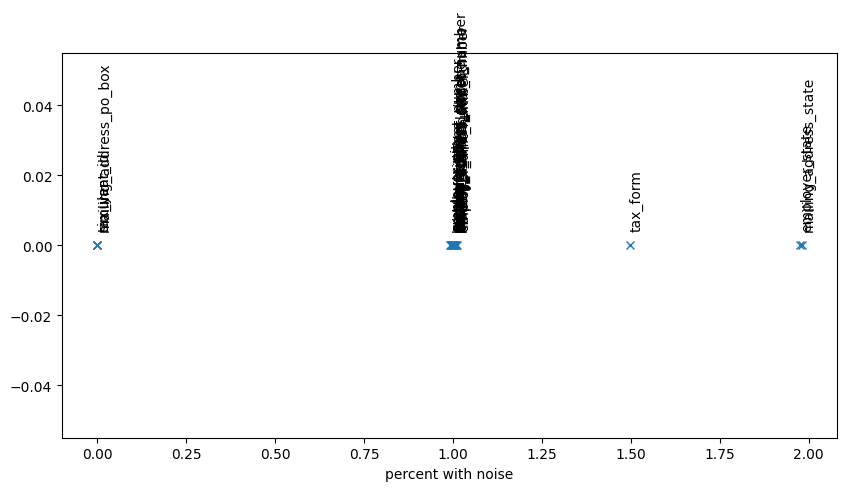

In [39]:
def scatter_1d(series, ax=None):
    if ax is None:
        ax = plt.gca()
    x = series
    y = np.zeros_like(series)
    col_name = series.index
    ax.plot(x, y, 'x')
    for col_name_i, xi, yi in zip(col_name, x, y+0.005):
        ax.annotate(col_name_i, (xi, yi), rotation=90)
    ax.set_xlabel('percent with noise')
    
fig, ax = plt.subplots(figsize=(10,5))
scatter_1d(percent_nonmissing_noised, ax)

# Zoom in on columns with around 1% noise

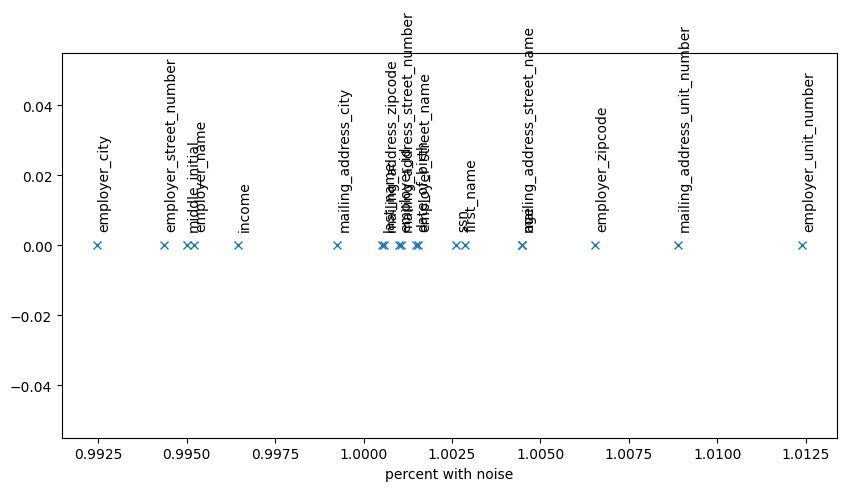

In [42]:
cols_to_omit = [
    'tax_year', 'simulant_id', 'mailing_address_po_box', # These have zero noise
    'tax_form', # This has about 1.5% noise
    'mailing_address_state', 'employer_state', # These have about 2% noise
]
fig, ax = plt.subplots(figsize=(10,5))
scatter_1d(percent_nonmissing_noised.drop(cols_to_omit), ax)

# Why do the "state" columns have 2% noise?

It must be about the probabilities. See how many different types of noise each column is getting.

## The only columns getting 2 noise types are the 3 columns with percentage noised values significantly larger than 1%

That's a good sign... let's see if we can compute the expected percentages below.

In [43]:
[k for k in config['taxes_w2_and_1099'].keys() if 'state' in k]

['employer_state', 'mailing_address_state']

In [44]:
config['taxes_w2_and_1099']['employer_state']

missing_data:
    row_noise_level:
        base: 0.01
            source: initial data
incorrect_selection:
    row_noise_level:
        base: 0.01
            source: initial data

In [45]:
config['taxes_w2_and_1099']['mailing_address_state']

missing_data:
    row_noise_level:
        base: 0.01
            source: initial data
incorrect_selection:
    row_noise_level:
        base: 0.01
            source: initial data

In [46]:
1-.99**2 # = 1 - (1-.01)*(1-.01)

0.01990000000000003

In [47]:
.99**2

0.9801

In [48]:
.99**3

0.970299

In [49]:
len(config['taxes_w2_and_1099']['mailing_address_state'].keys())

2

In [52]:
type(config['taxes_w2_and_1099']['mailing_address_state'])

vivarium.config_tree.ConfigTree

In [53]:
from vivarium.config_tree import ConfigTree

In [55]:
two_noise_types = [
    k for k in config['taxes_w2_and_1099'].keys()
     if isinstance(config['taxes_w2_and_1099'][k], ConfigTree)
     and len(config['taxes_w2_and_1099'][k].keys()) == 2
]
two_noise_types

['employer_state', 'tax_form', 'mailing_address_state']

In [60]:
for col in two_noise_types:
    print(col, config['taxes_w2_and_1099'][col], sep='\n\n')
    print('\n')

employer_state

missing_data:
    row_noise_level:
        base: 0.01
incorrect_selection:
    row_noise_level:
        base: 0.01


tax_form

missing_data:
    row_noise_level:
        base: 0.01
incorrect_selection:
    row_noise_level:
        base: 0.01


mailing_address_state

missing_data:
    row_noise_level:
        base: 0.01
incorrect_selection:
    row_noise_level:
        base: 0.01




# How do we compute the correct probabilities for getting noise?

For incorrect select: P(different state | selected) = 49 / 50, so

P(different state)  = P(different state | selected) P(selected) = (49/50) * 0.01 = 0.98 * 0.01 = 0.0098.

### Thus, using the inclusion-exclusion formula:

P(different) = P(different state or missing)

= P(different state) + P(missing) - P(different state and missing)

= P(different state) + P(missing) - P(different state) * P(missing)

= 0.0098 + 0.01 - 0.0098 * 0.01

= 0.019702

In [62]:
49/50 *.01

0.0098

In [63]:
0.0098 + 0.01 - 0.0098 * 0.01

0.019701999999999997

In [64]:
.01+.01-.01*.01 # = .01(2-.01)

0.0199

In [65]:
1-0.0199

0.9801

# Here's a different way to compute the same thing:

For "incorrect selection" noise:

P(same state | selected) = 1/50, so

P(same state) = P(same state | selected) P(selected) + P(same state | not selected) P(not selected)

= (1/50) * (1/100) + 1 * (99/100)

= 0.0002 + 0.99

= 0.9902

### Now think of 2 independent steps for changing or not changing the value:

1. Decide missing -- P(not missing) = 1 - 0.01 = 0.99
2. Pick random state -- P(same state) = 0.9902

So

P(no noise) = P(not missing and same state) = P(not missing) P(same state) = 0.99 * 0.9902 = 0.980298

P(noise) = 1 - P(no noise) = 1 - 0.980298 = 0.019702

In [67]:
(1/50) * (1/100) + 1 * (99/100) # P(same state)

0.9902

In [69]:
1 - (.0002 + .99)

0.009800000000000031

In [70]:
0.99 * 0.9902

0.980298

In [71]:
1 - 0.980298

0.019701999999999997

## Proof that the two methods give the same result:

# So what about for tax forms?

P(wrong form | selected) = P(wrong form | W2) * P(W2) + P(wrong selection | 1099) * P(1099)

= (1/2) * P(W2) + (1/2) * P(1099) = 1/2 * (P(W2) + P(1099)) = 1/2

So P(wrong form) = P(wrong form | selected) * P(selected)

= 1/2 * 0.01

= 0.005

Note that this probability only depends on the number of different options for incorrect selection. Here there are only 2 options, whereas for states we had 50.

### Using the inclusion-exclusion formula:

P(different) = P(missing or wrong form)

= P(missing) + P(wrong form) - P(missing and wrong form)

= .01 + .005 - .01*.005

= 0.01495

In [74]:
%%time
df_w2.tax_form.value_counts() / n # The ratio of W2 to 1099 doesn't affect the probability above

CPU times: user 439 ms, sys: 191 µs, total: 439 ms
Wall time: 439 ms


W2      0.946439
1099    0.053561
Name: tax_form, dtype: float64

In [75]:
.01 + .005 - .01*.005

0.01495

# Check no-name employer I found in other notebook

In [79]:
df_weird_employer = df_w2.loc[df_w2.employer_id=='1726494']
df_weird_employer

,tax_form,mailing_address_street_name,mailing_address_city,mailing_address_po_box,tax_year,employer_street_name,age,mailing_address_state,employer_state,date_of_birth,...,employer_zipcode,mailing_address_street_number,simulant_id,employer_city,employer_id,first_name,income,employer_street_number,last_name,mailing_address_zipcode
1199313,W2,delrose dr n,buffalo,0,2021,duvan drive,25,NY,NY,1996-04-25,...,13368,5334,3568_391687,ridge,1726494,Jasmine,14294.022166735305,10228,Noble,11206
1487743,W2,bedard ave,new york,0,2021,duvan drive,36,NY,NY,1985-08-06,...,13368,14857,3568_700485,ridge,1726494,Jamie,21221.537718392436,10228,Cordova,10469
1834319,W2,blackhawk dr,oshkosh,0,2022,duvan drive,25,WI,NY,1997-06-29,...,13368,905,3568_57225,ridge,1726494,Jose,4951.7173949285425,10228,Witte,54703
2150485,W2,delrose dr n,buffalo,0,2022,duvan drive,26,NY,NY,1996-04-25,...,13368,5334,3568_391687,ridge,1726494,Jasmine,46455.572041889754,10228,Noble,11206
2442728,W2,bedard ave,new york,0,2022,duvan drive,37,NY,NY,1985-08-06,...,13368,14857,3568_700485,ridge,1726494,Jamie,9094.944736453901,10228,Cordova,10469
2799678,W2,waterview ct,birmingham,0,2023,duvan drive,26,AL,NY,1997-06-29,...,13368,48715,3568_57225,ridge,1726494,Jose,54468.89134421397,10228,Witte,35124
3117061,W2,delrose dr n,buffalo,0,2023,duvan drive,27,NY,NY,1996-04-25,...,13368,5334,3568_391687,ridge,1726494,Jasmine,46455.572041889754,10228,Noble,11206
4094760,W2,delrose dr n,buffalo,0,2024,duvan drive,28,NY,NY,1996-04-25,...,13368,5334,3568_391687,ridge,1726494,Jasmine,46455.572041889754,10228,Noble,11206
5091871,1099,delrose dr n,buffalo,0,2025,duvan drive,29,NY,NY,1996-04-25,...,13368,5334,3568_391687,ridge,1726494,Jasmine,14294.022166735305,10228,Noble,11206
5117346,W2,east dundee raod,northbrook,0,2025,duvan drive,86,IL,NY,1939-11-04,...,13368,1030,3568_417644,ridge,1726494,Robert,22471.837264179616,10228,Beitel,60435


In [80]:
df_weird_employer.employer_name

1199313    
1487743    
1834319    
2150485    
2442728    
2799678    
3117061    
4094760    
5091871    
5117346    
6128562    
6561378    
7128783    
8135231    
8989458    
9110737    
Name: employer_name, dtype: object

# Count missing values

The only rows missing `employer_name` are the 16 rows above.

In [81]:
%%time
(df_w2 == '').sum()

CPU times: user 9.87 s, sys: 9.97 ms, total: 9.88 s
Wall time: 9.86 s


tax_form                               0
mailing_address_street_name       313054
mailing_address_city                   0
mailing_address_po_box                 0
tax_year                               0
employer_street_name                   0
age                                    0
mailing_address_state                  0
employer_state                         0
date_of_birth                          0
employer_unit_number             9227443
mailing_address_unit_number      9271377
employer_name                         16
ssn                                    0
middle_initial                         0
employer_zipcode                       0
mailing_address_street_number     819378
simulant_id                            0
employer_city                          0
employer_id                            0
first_name                             0
income                                 0
employer_street_number            427820
last_name                              0
mailing_address_